In [ ]:
from fairlearn.metrics import (
    MetricFrame,
    false_positive_rate,
    true_positive_rate,
    selection_rate
)

C:\Users\Priti\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Priti\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\Priti\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [ ]:
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
import scikeras

In [ ]:
import warnings
from tensorflow import get_logger
get_logger().setLevel('ERROR')
warnings.filterwarnings("ignore", message="Setting the random state for TF")

In [ ]:
data = fetch_openml(data_id=1590, as_frame=True)

In [ ]:
X_raw = data.data
Y = (data.target == '>50K') * 1
sex = data.data["sex"]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
X = X_raw.drop(labels=['sex'], axis=1)
X = pd.get_dummies(X)

In [ ]:
X.shape

(48842, 103)

In [ ]:
from tensorflow import keras


def get_clf(meta, hidden_layer_sizes, dropout):
    n_features_in_ = meta["n_features_in_"]
    n_classes_ = meta["n_classes_"]
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape=(n_features_in_,)))
    for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(hidden_layer_size, activation="relu"))
        model.add(keras.layers.Dropout(dropout))
    model.add(keras.layers.Dense(1, activation="sigmoid"))
    return model

In [ ]:
from scikeras.wrappers import KerasClassifier


clf = KerasClassifier(
    model=get_clf,
    loss="binary_crossentropy",
    hidden_layer_sizes=(100,),
    dropout=0.5,
)

In [ ]:
clf.fit(X, Y);

1527/1527 [==============================] - 2s 1ms/step - loss: 640.2384


In [ ]:
y_pred = clf.predict(X)

1527/1527 [==============================] - 1s 557us/step


In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

In [ ]:
import sklearn.metrics as skm
metrics = {
    'accuracy': accuracy_score,
    'precision': precision_score,
    'recall': recall_score,
    'false positive rate': false_positive_rate,
    'true positive rate': true_positive_rate,
    'selection rate': selection_rate,
    'count': lambda Y, y_pred: len(Y),
    'average precision':skm.average_precision_score,
    'roc-auc': skm.roc_auc_score,
}

In [ ]:
metric_frame = MetricFrame(metrics,
                           y_true=Y,
                           y_pred=y_pred,
                           sensitive_features=sex)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028122296470>,
      dtype=object)

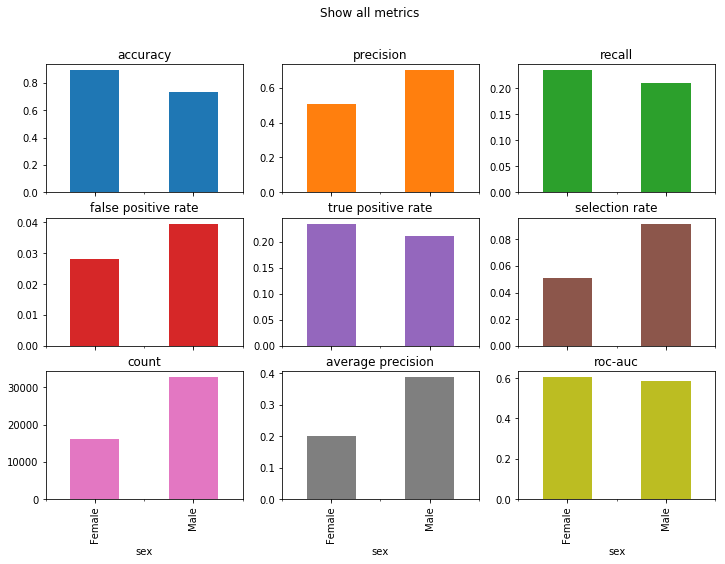

In [ ]:
metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="Show all metrics",
)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002812259BE48>,
      dtype=object)

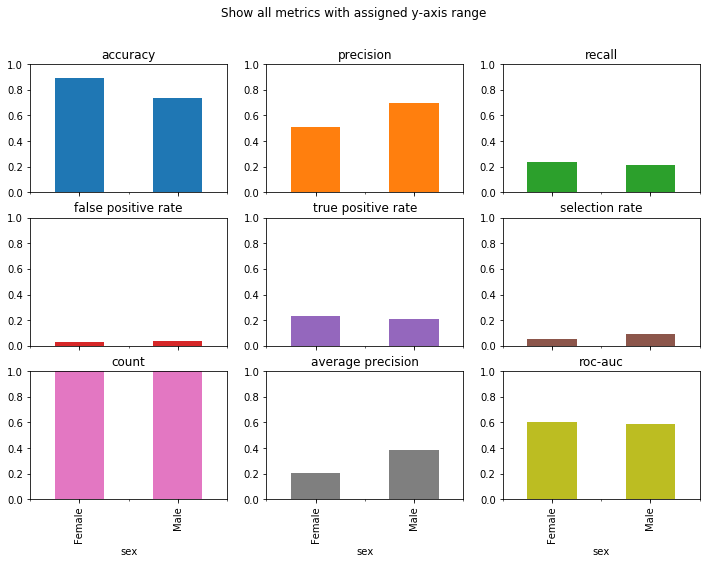

In [ ]:
# Customize plots with ylim
    metric_frame.by_group.plot(
    kind="bar",
    ylim=[0, 1],
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="Show all metrics with assigned y-axis range",
)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000281225AD048>,
      dtype=object)

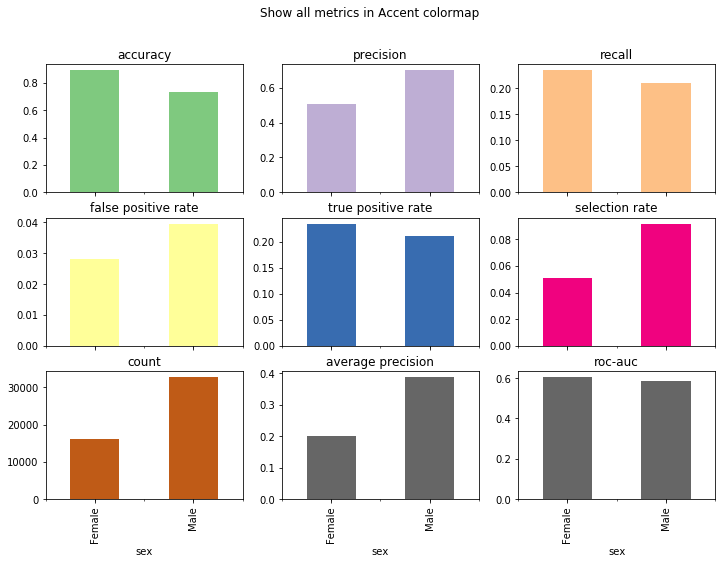

In [ ]:
# Customize plots with colormap
metric_frame.by_group.plot(
    kind="bar",
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    colormap="Accent",
    title="Show all metrics in Accent colormap",
)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028123D045F8>,
      dtype=object)

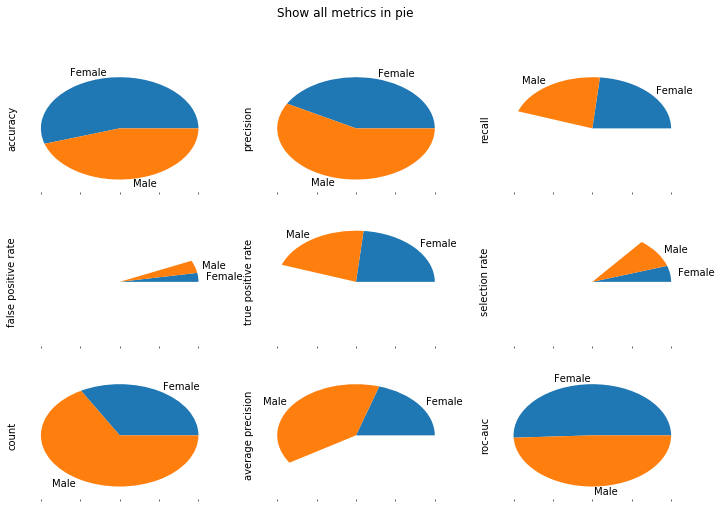

In [ ]:
# Customize plots with kind
metric_frame.by_group.plot(
    kind="pie",
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="Show all metrics in pie",
)

In [ ]:
import fairlearn
fairlearn.metrics.false_negative_rate(Y, y_pred, sample_weight=None)

0.7852314537520322

In [ ]:
fairlearn.metrics.false_positive_rate(Y, y_pred, sample_weight=None)

0.035069304265913065

In [ ]:
fairlearn.metrics.demographic_parity_difference(Y, y_pred, sensitive_features=sex, sample_weight=None)

0.041026926499161676

In [ ]:
from fairlearn.metrics import selection_rate
sr = MetricFrame(selection_rate, Y, y_pred, sensitive_features=sex)
sr.overall

0.07806805618115556

In [ ]:
sr.by_group

sex
Female    0.0506423
Male      0.0916692
Name: selection_rate, dtype: object